In [31]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx import grid_graph, hexagonal_lattice_graph
import numpy.ma as ma

## Функция отрисовки

In [140]:
def draw_planar(graph, i=0):
    pos = nx.planar_layout(graph)
    plt.figure(i, figsize=(5, 5))
    nx.draw(graph,
            pos,
            node_color='orange',
            node_size=400,
            with_labels=True)

In [163]:
def draw(graph, i=0):
    pos = nx.circular_layout(graph)
    plt.figure(i, figsize=(5, 5))
    nx.draw(graph,
            pos,
            node_color='orange',
            node_size=400,
            with_labels=True)

## Функция проверки баланса

In [ ]:
def check_balance(graph, signs):
    balanced = True
    edges = list(graph.edges())
    for cycle in nx.cycle_basis(graph):
        nodes_mul = 1
        for i in range(len(cycle)-1):
            if (cycle[i], cycle[i+1]) in edges:
                add_sign = signs[edges.index((cycle[i], cycle[i+1]))]
            else:
                add_sign = signs[edges.index((cycle[i+1], cycle[i]))]
            nodes_mul *= add_sign
        if (cycle[0], cycle[-1]) in edges:
            add_sign = signs[edges.index((cycle[0], cycle[-1]))]
        else:
            add_sign = signs[edges.index((cycle[-1], cycle[0]))]
        nodes_mul *= add_sign
        if nodes_mul < 0:
            balanced = False
            break
    if balanced:
        print("Граф сбалансированный")
    else:
        print("Граф несбалансированный")
    return balanced

# Задание 1

## Создание графа и распределение знаков

In [142]:
n = 15
p = 0.1
while True:
    graph = nx.gnp_random_graph(n, p, seed=random.randint(1, 180))
    if nx.is_connected(graph) and nx.check_planarity(graph):
        break


In [143]:
signs = np.random.choice([-1, 1], size=(len(graph.edges)))

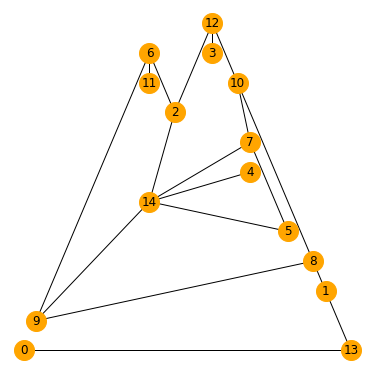

In [144]:
draw_planar(graph)

In [145]:
check_balance(graph, signs)

Граф несбалансированный


False

# Задание 2

## Создание графа и распределение знаков

In [159]:
n = 100
p = 0.05
while True:
    graph2 = nx.gnp_random_graph(n, p, seed=random.randint(1, 180))
    if nx.is_connected(graph2):
        break


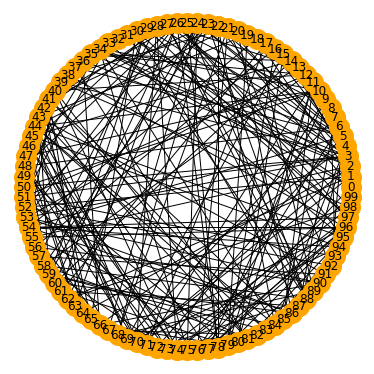

In [164]:
draw(graph2)

In [165]:
signs2 = np.random.choice([-1, 1], size=(len(graph2.edges)))

In [166]:
check_balance(graph2, signs2)

Граф несбалансированный


False

# Задание 3 (домашнее)

## Изменение распределение знаков у графа

На каждой итерации знаки меняются у исходного графа из задания 2

In [286]:
k = len(graph2.edges())//10 
new_signs=np.empty((5, len(signs2)))
edges = np.asarray(graph2.edges())
edge_names = []
for i in range(5):
    edge_names.append([])
    new_signs[i] = signs2.copy()
    changing_edges=np.random.choice(range(1, len(signs2)), k, replace=False)
    for edge in changing_edges:
        new_signs[i][edge] = -new_signs[i][edge]
        edge_names[i].append(list(edges[edge]))


In [287]:
def get_analytics(edge_names):
    in_one_cycle = False 
    for cycle in nx.cycle_basis(graph2):
        cycle_edges = []
        for i in range(len(cycle)-1):
            cycle_edges.extend(
                ((cycle[i], cycle[i+1]), (cycle[i+1], cycle[i])))
        cycle_edges.extend(((cycle[0], cycle[-1]), (cycle[-1], cycle[0])))
        if all(edge_name in cycle_edges for edge_name in edge_names):
            in_one_cycle = True
    hanging = []
    for edge_name in edge_names:
        if len(np.where(edges.flatten() == edge_name[0])[0]) == 1 or len(np.where(edges.flatten() == edge_name[1])[0]) == 1:
            hanging.append(True)
        else:
            hanging.append(False)

    return in_one_cycle, hanging


In [288]:
for i in range(5):
    print(f"Граф {i+1}")
    print(f'Изменены знаки у рёбер: {edge_names[i]}')
    analytics = get_analytics(edge_names[i])
    if analytics[0]:
        print('Все рёбра находятся в одном цикле')
    else:
        print('Все рёбра не находятся в одном цикле')
    if sum(analytics[1]):
        print(f'Висячие рёбра в выбранных: {[edge_names[i][j] for j in range(len(edge_names[i])) if analytics[1][j]]}')
    else:
        print('Висячих ребёр в выбранных нет')  
    check_balance(graph2, new_signs[i])
    print('\n')

Граф 1
Изменены знаки у рёбер: [[72, 88], [5, 28], [82, 91], [6, 48], [26, 63], [4, 87], [60, 86], [17, 71], [7, 69], [8, 19], [2, 36], [26, 48], [35, 36], [38, 41], [40, 74], [2, 70], [77, 97], [54, 86], [61, 87], [0, 31], [34, 84], [23, 88], [11, 79], [84, 85]]
Все рёбра не находятся в одном цикле
Висячих ребёр в выбранных нет
Граф несбалансированный


Граф 2
Изменены знаки у рёбер: [[66, 68], [27, 42], [59, 84], [11, 80], [26, 98], [40, 74], [54, 86], [62, 98], [64, 75], [44, 83], [5, 22], [24, 75], [11, 85], [61, 79], [39, 98], [12, 35], [26, 78], [55, 96], [82, 91], [5, 24], [53, 64], [2, 3], [77, 97], [38, 96]]
Все рёбра не находятся в одном цикле
Висячих ребёр в выбранных нет
Граф несбалансированный


Граф 3
Изменены знаки у рёбер: [[26, 41], [93, 95], [19, 79], [10, 21], [15, 80], [58, 60], [1, 62], [15, 69], [4, 6], [51, 93], [29, 61], [23, 68], [38, 41], [30, 65], [38, 96], [23, 52], [18, 54], [41, 85], [0, 76], [72, 79], [61, 79], [47, 59], [45, 94], [1, 18]]
Все рёбра не на

При пяти изменениях граф остался несбалансированным